In [198]:
import warnings
warnings.filterwarnings("ignore")
import itertools
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
from datetime import datetime

%matplotlib inline

In [199]:
df = pd.read_csv('../data/sales-of-company-x-jan-1965-to-m.csv')
df.head()

,Month,"Sales of company X, Jan. 1965 to May 1971"
0,1965-01,154
1,1965-02,96
2,1965-03,73
3,1965-04,49
4,1965-05,36


In [200]:
df = df.rename(columns={'Month':'month', 'Sales of company X, Jan. 1965 to May 1971':'sales'})
df.head(2)

,month,sales
0,1965-01,154
1,1965-02,96


In [201]:
df['month'].tail()

73               1971-02
74               1971-03
75               1971-04
76               1971-05
77    Sales of company X
Name: month, dtype: object

In [202]:
df.drop(index=77, inplace=True)

In [203]:
df['month'].min(), df['month'].max()

('1965-01', '1971-05')

In [204]:
df.isnull().sum()

month    0
sales    0
dtype: int64

In [205]:
df.sales = df.sales.astype('int64')

In [206]:
df = df.groupby('month')['sales'].sum().reset_index()

In [207]:
df['month'] = pd.to_datetime(df.month, format = '%Y-%m-%d')

In [208]:
df = df.set_index('month')
df.index

DatetimeIndex(['1965-01-01', '1965-02-01', '1965-03-01', '1965-04-01',
               '1965-05-01', '1965-06-01', '1965-07-01', '1965-08-01',
               '1965-09-01', '1965-10-01', '1965-11-01', '1965-12-01',
               '1966-01-01', '1966-02-01', '1966-03-01', '1966-04-01',
               '1966-05-01', '1966-06-01', '1966-07-01', '1966-08-01',
               '1966-09-01', '1966-10-01', '1966-11-01', '1966-12-01',
               '1967-01-01', '1967-02-01', '1967-03-01', '1967-04-01',
               '1967-05-01', '1967-06-01', '1967-07-01', '1967-08-01',
               '1967-09-01', '1967-10-01', '1967-11-01', '1967-12-01',
               '1968-01-01', '1968-02-01', '1968-03-01', '1968-04-01',
               '1968-05-01', '1968-06-01', '1968-07-01', '1968-08-01',
               '1968-09-01', '1968-10-01', '1968-11-01', '1968-12-01',
               '1969-01-01', '1969-02-01', '1969-03-01', '1969-04-01',
               '1969-05-01', '1969-06-01', '1969-07-01', '1969-08-01',
      

In [209]:
df.head()

,sales
month,
1965-01-01,154
1965-02-01,96
1965-03-01,73
1965-04-01,49
1965-05-01,36


In [210]:
y = df['sales']

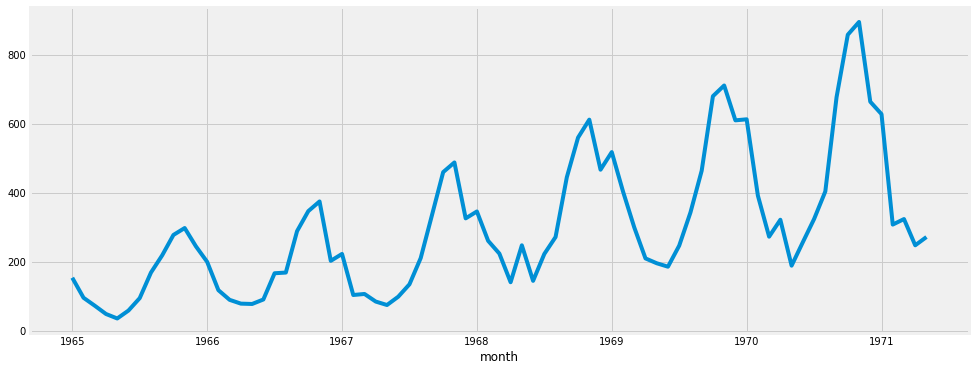

In [211]:
y.plot(figsize=(15, 6))
plt.show()

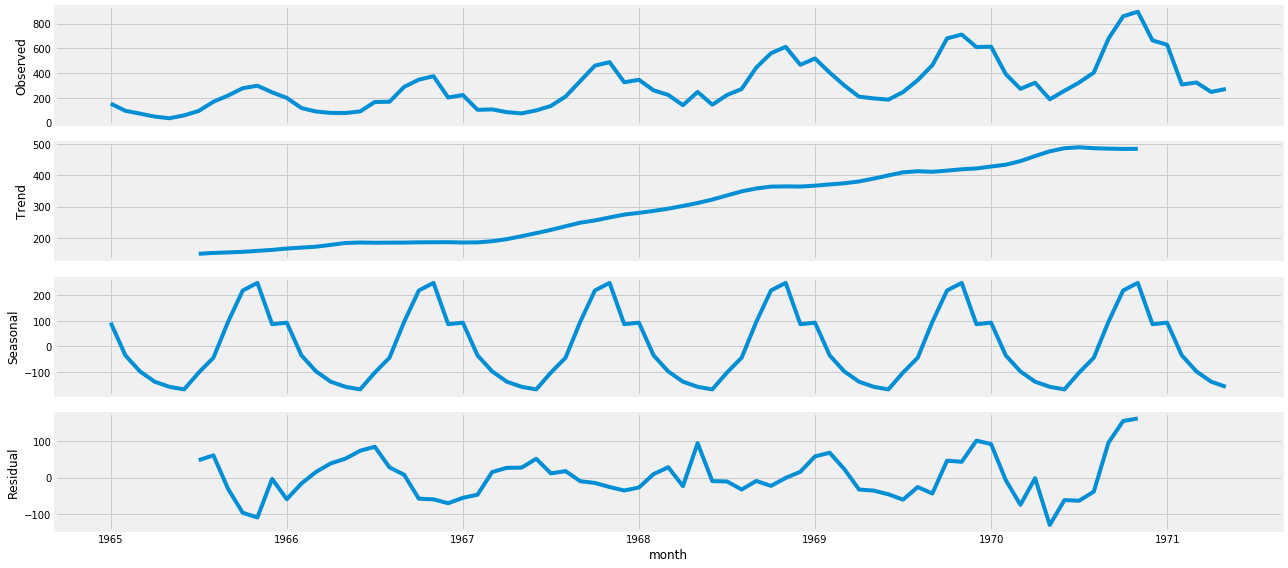

In [212]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [213]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [214]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
                continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1112.5130723397733
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:895.8566138988509
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:759.7969978318756
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:616.0311132892906
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:725.9045082910741
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:710.2803007829078
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:618.8242209701367
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:603.6043290693696
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1027.578809661662
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:834.3938275586061
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:730.9967273898612
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:598.083212738621
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:723.3175002012642
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:693.1577120786085
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:616.4078920024338
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:590.9524155653115
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:907.2762033799626
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:746.2265193372148
ARIMA(0, 1

In [215]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7369      0.215     -3.426      0.001      -1.158      -0.315
ma.L1          0.2985      0.271      1.101      0.271      -0.233       0.830
ar.S.L12      -0.0348      0.176     -0.197      0.844      -0.381       0.311
sigma2      3845.0646    793.580      4.845      0.000    2289.675    5400.454


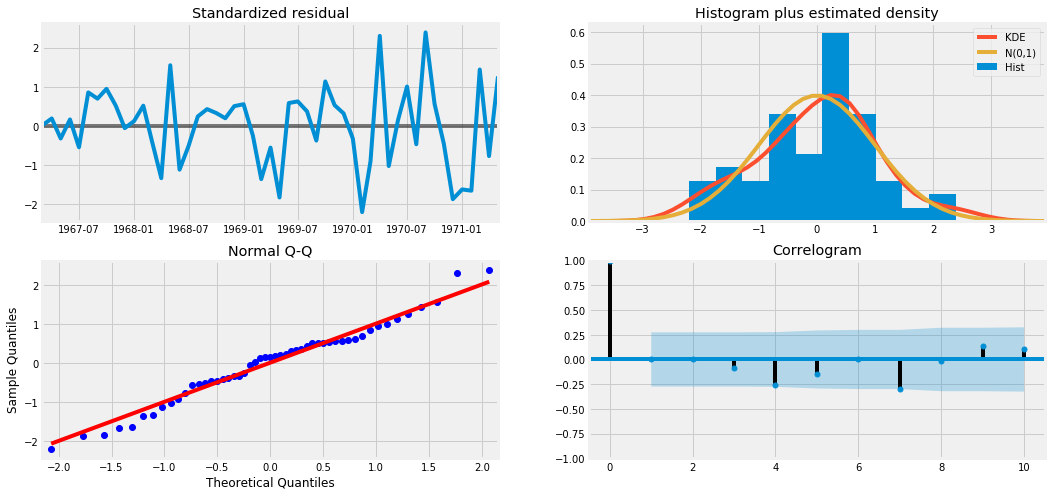

In [216]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

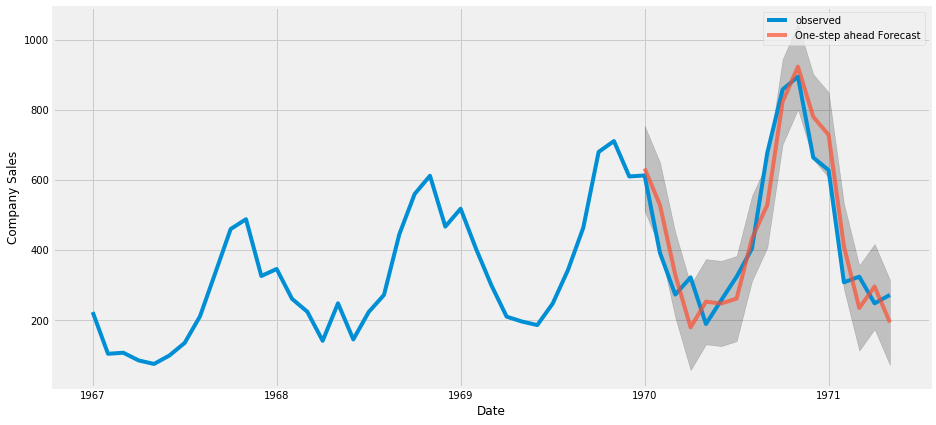

In [217]:
pred = results.get_prediction(start=pd.to_datetime('1970-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['1967':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Company Sales')
plt.legend()
plt.show()

In [218]:
y_forecasted = pred.predicted_mean
y_truth = y['1970-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 7416.36


In [219]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 86.12


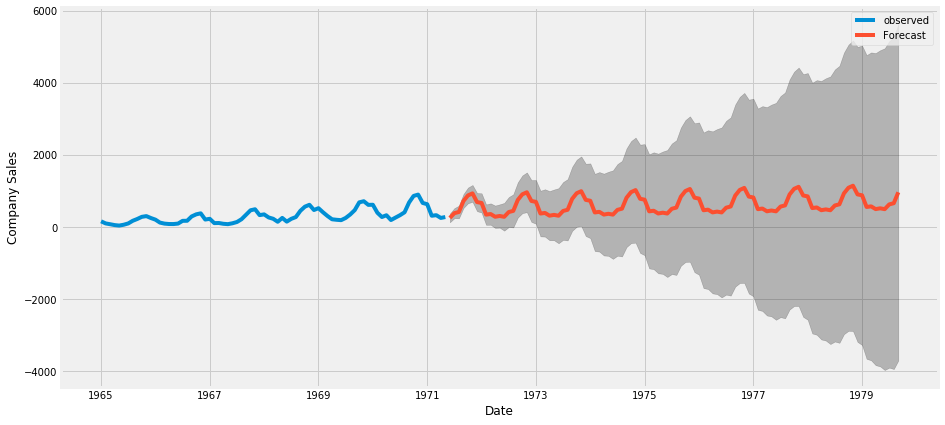

In [220]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Company Sales')
plt.legend()
plt.show()

In [224]:
df = df.reset_index()

In [225]:
df.head()

,month,y
0,1965-01-01,154
1,1965-02-01,96
2,1965-03-01,73
3,1965-04-01,49
4,1965-05-01,36


In [226]:
from fbprophet import Prophet
df = df.rename(columns={'month': 'ds', 'sales': 'y'})

In [227]:
model = Prophet(interval_width=0.95)
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [228]:
df.shape

(77, 2)

<Figure size 1296x432 with 0 Axes>

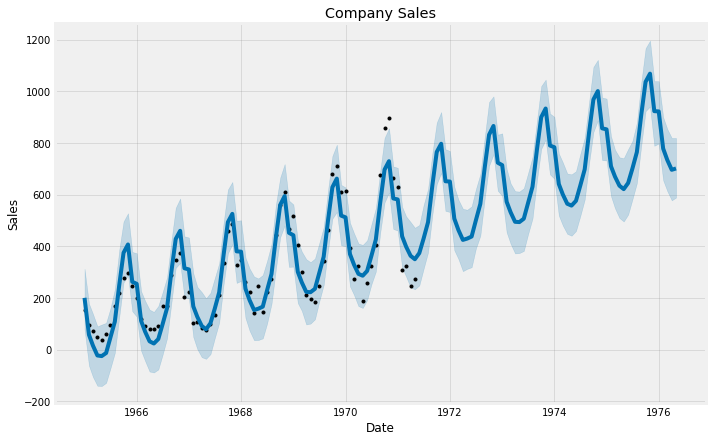

In [229]:
forecast = model.make_future_dataframe(periods=60, freq='MS')
forecast = model.predict(forecast)
plt.figure(figsize=(18, 6))
model.plot(forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Company Sales');

In [230]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1965-01-01,115.939439,78.673154,312.963611,115.939439,115.939439,84.585078,84.585078,84.585078,84.585078,84.585078,84.585078,0.0,0.0,0.0,200.524517
1,1965-02-01,120.411880,-61.769022,177.849664,120.411880,120.411880,-62.756483,-62.756483,-62.756483,-62.756483,-62.756483,-62.756483,0.0,0.0,0.0,57.655397
2,1965-03-01,124.451504,-105.820991,138.030592,124.451504,124.451504,-108.899294,-108.899294,-108.899294,-108.899294,-108.899294,-108.899294,0.0,0.0,0.0,15.552211
3,1965-04-01,128.923946,-139.691793,89.987681,128.923946,128.923946,-151.488605,-151.488605,-151.488605,-151.488605,-151.488605,-151.488605,0.0,0.0,0.0,-22.564660
4,1965-05-01,133.252114,-140.856630,97.077826,133.252114,133.252114,-158.177778,-158.177778,-158.177778,-158.177778,-158.177778,-158.177778,0.0,0.0,0.0,-24.925663


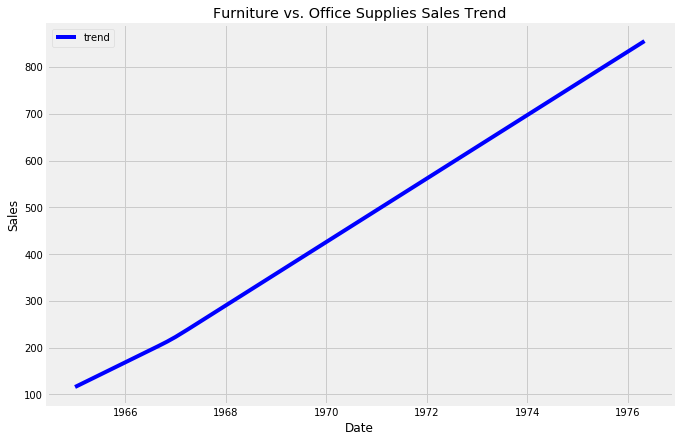

In [231]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['ds'], forecast['trend'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Sales Trend');

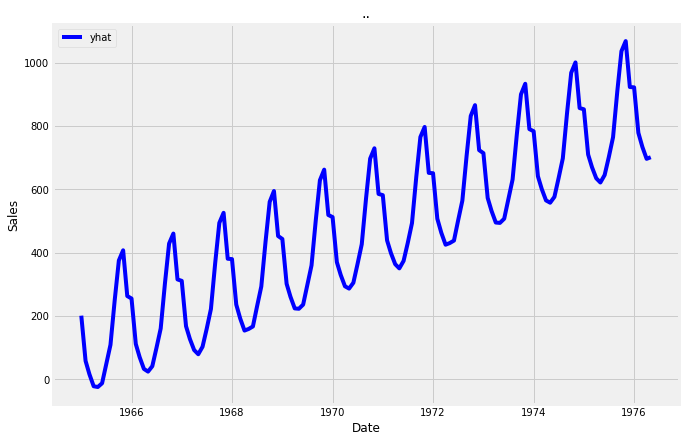

In [232]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['ds'], forecast['yhat'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('..');

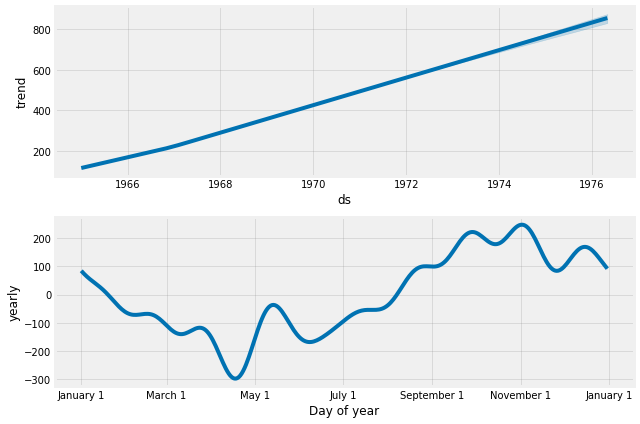

In [234]:
model.plot_components(forecast);